<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/unsupervised_Hierarchical_clustering_energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster


In [ ]:
energy = pd.read_csv('/content/energy_consumption.csv')

In [ ]:
energy

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06
...,...,...,...,...,...,...
4995,CUSTOMER_4996,commercial,Southeast,45,4,146.67
4996,CUSTOMER_4997,residential,Southeast,24,1,72.91
4997,CUSTOMER_4998,residential,South,17,2,72.22
4998,CUSTOMER_4999,commercial,Northeast,45,2,86.28


In [ ]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   object 
 1   customer_type     5000 non-null   object 
 2   regions           5000 non-null   object 
 3   building_size_m2  5000 non-null   int64  
 4   occupants         5000 non-null   int64  
 5   energy_cost_brl   5000 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 234.5+ KB


In [ ]:
energy.head()

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,CUSTOMER_0001,residential,Northeast,24,2,64.51
1,CUSTOMER_0002,commercial,Midwest,24,1,55.26
2,CUSTOMER_0003,commercial,Southeast,24,1,74.54
3,CUSTOMER_0004,residential,Northeast,45,4,147.06
4,CUSTOMER_0005,residential,Southeast,45,4,143.06


In [ ]:
energy.isnull().sum()

,0
customer_id,0
customer_type,0
regions,0
building_size_m2,0
occupants,0
energy_cost_brl,0


In [ ]:
energy.duplicated().sum()

np.int64(0)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in energy.select_dtypes(include=['object']).columns:
  energy[i] = le.fit_transform(energy[i])

In [ ]:
energy

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl
0,0,1,2,24,2,64.51
1,1,0,0,24,1,55.26
2,2,0,4,24,1,74.54
3,3,1,2,45,4,147.06
4,4,1,4,45,4,143.06
...,...,...,...,...,...,...
4995,4995,0,4,45,4,146.67
4996,4996,1,4,24,1,72.91
4997,4997,1,3,17,2,72.22
4998,4998,0,2,45,2,86.28


In [ ]:
X = energy[["energy_cost_brl","occupants"]]


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [ ]:
for i in energy.columns:
  energy[i] = sc.fit_transform(energy[[i]])

In [ ]:
Z = linkage(X,method='ward')

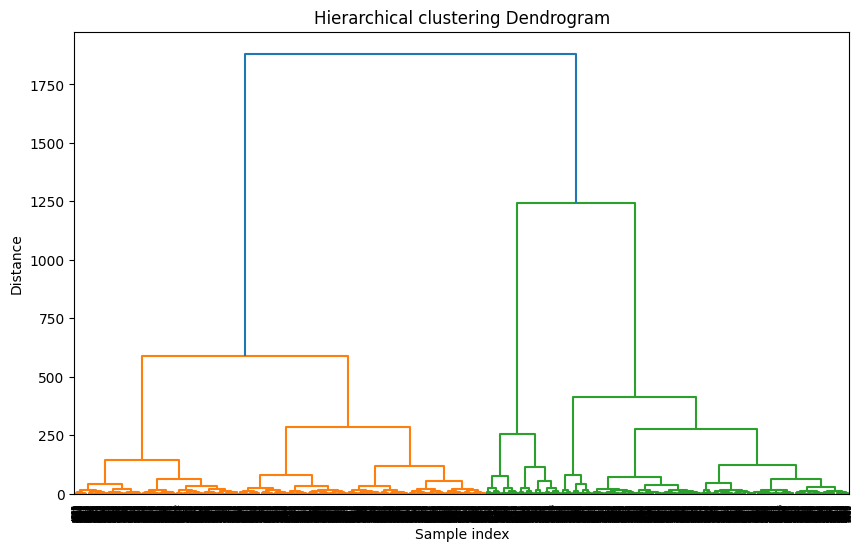

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.title('Hierarchical clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

In [ ]:
X

,energy_cost_brl,occupants
0,64.51,2
1,55.26,1
2,74.54,1
3,147.06,4
4,143.06,4
...,...,...
4995,146.67,4
4996,72.91,1
4997,72.22,2
4998,86.28,2


In [ ]:
clusters=fcluster(Z,t=2,criterion='maxclust')

In [ ]:
clusters

array([1, 1, 1, ..., 1, 2, 1], dtype=int32)

In [ ]:
energy['cluster']=clusters

In [ ]:
energy

,customer_id,customer_type,regions,building_size_m2,occupants,energy_cost_brl,cluster
0,-1.731704,0.730255,0.498214,-0.889325,-0.292265,-0.917279,1
1,-1.731012,-1.369385,-0.993890,-0.889325,-1.260669,-1.296676,1
2,-1.730319,-1.369385,1.990317,-0.889325,-1.260669,-0.505891,1
3,-1.729626,0.730255,0.498214,0.309673,1.644545,2.468578,2
4,-1.728933,0.730255,1.990317,0.309673,1.644545,2.304515,2
...,...,...,...,...,...,...,...
4995,1.728933,-1.369385,1.990317,0.309673,1.644545,2.452582,2
4996,1.729626,0.730255,1.990317,-0.889325,-1.260669,-0.572746,1
4997,1.730319,0.730255,1.244265,-1.288991,-0.292265,-0.601047,1
4998,1.731012,-1.369385,0.498214,0.309673,-0.292265,-0.024365,2


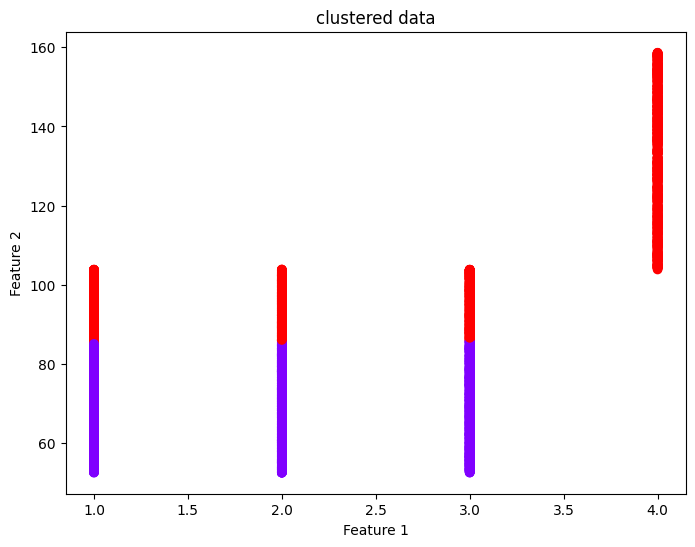

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X["occupants"],X["energy_cost_brl"],c=clusters,cmap='rainbow')
plt.title('clustered data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()